In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

In [4]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pubs_author_funder.head()

,id,author_country,funder_country
0,30507292,[Turkey],[Turkey]
1,30574690,"[United States, France]","[United States, United States, United States, ..."
2,30574691,[Russia],[Russia]
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]"
4,30585097,"[Germany, Spain]",[Spain]


In [5]:
author_df=pubs_author_funder[['id','author_country']]
author_df = author_df.explode('author_country')
author_df.head()

,id,author_country
0,30507292,Turkey
1,30574690,United States
1,30574690,France
2,30574691,Russia
3,30585095,Spain


In [6]:
author_distinct_df=author_df.drop_duplicates()
author_distinct_df.head()

,id,author_country
0,30507292,Turkey
1,30574690,United States
1,30574690,France
2,30574691,Russia
3,30585095,Spain


In [9]:
funder_df=pubs_author_funder[['id','funder_country']]
funder_df=funder_df.explode('funder_country')
funder_df.head()

,id,funder_country
0,30507292,Turkey
1,30574690,United States
1,30574690,United States
1,30574690,United States
1,30574690,United States


In [10]:
art_cntry_unit = funder_df.groupby(
    ['id','funder_country']).size().reset_index(name="unit")
art_cntry_unit.head()

,id,funder_country,unit
0,30507292,Turkey,1
1,30574690,United States,4
2,30574691,Russia,1
3,30585095,Spain,6
4,30585097,Spain,1


In [92]:

cntry_fund = art_cntry_unit[art_cntry_unit.funder_country=="China"]
if not cntry_fund.empty:
    cntry_unit=cntry_fund.unit.tolist()
    bincount=np.bincount(cntry_unit)
    bins=np.arange(len(bincount))
    p=bincount/sum(bincount)

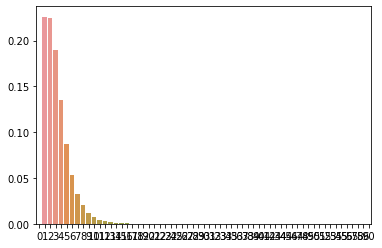

In [93]:
sns.barplot(bins, p)

In [11]:
def sample_funder(cntry_author, authorcntry,bins, p):
    num_units=cntry_author.shape[0]
    unitslist=np.random.choice(bins, num_units, p=p)
    cntry_author['funding_units']=unitslist
    cntry_author['funder_country'] = cntry_author['funding_units'].apply(
        lambda x:[authorcntry for a in range(x)])
    return cntry_author

In [12]:
authorlist=author_distinct_df.author_country.unique().tolist()
resampling_funder=pd.DataFrame()
for authorcntry in tqdm(authorlist):
    cntry_author=author_distinct_df[author_distinct_df.author_country==authorcntry]
    cntry_fund = art_cntry_unit[art_cntry_unit.funder_country==authorcntry]
    if not cntry_fund.empty:
        cntry_unit=cntry_fund.unit.tolist()
        bincount=np.bincount(cntry_unit)
        bins=np.arange(len(bincount))
        p=bincount/sum(bincount)
        
        cntry_funder_sample=sample_funder(cntry_author, authorcntry, bins, p)
        resampling_funder=pd.concat(
            [resampling_funder, cntry_funder_sample], ignore_index=True)

  0%|          | 0/206 [00:00<?, ?it/s]<ipython-input-11-65a2f9a63606>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_author['funding_units']=unitslist
<ipython-input-11-65a2f9a63606>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_author['funder_country'] = cntry_author['funding_units'].apply(
100%|██████████| 206/206 [27:27<00:00,  8.00s/it]


In [13]:
resampling_funder.to_csv("resampling_funder.csv", index=False)

In [51]:
#sampling_funder=pd.read_csv("resampling_funder.csv")
resampling_funder.head()

,id,funder_country
0,30507292,"[Turkey, Turkey]"
1,30590517,[Turkey]
2,30730821,[Turkey]
3,30730942,[Turkey]
4,30746044,[Turkey]


In [55]:
resampling_funder.head(100000).groupby(
    'id')['funder_country'].apply(sum).reset_index()

,id,funder_country
0,30507292,"[Turkey, Turkey]"
1,30590517,[Turkey]
2,30721285,[Turkey]
3,30726309,[Turkey]
4,30726319,"[Turkey, Turkey]"
...,...,...
99995,65273844,[Turkey]
99996,65282478,[Turkey]
99997,65285838,[Turkey]
99998,65298059,"[Turkey, Turkey]"


In [57]:
tqdm.pandas()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [58]:
resampling_funder=resampling_funder[['id','funder_country']]
resampling_funder = resampling_funder.groupby(
    'id')['funder_country'].progress_apply(sum)

100%|██████████| 12759056/12759056 [30:55<00:00, 6877.11it/s]


In [62]:
resampling_funder = resampling_funder.reset_index()

In [63]:
resampling_funder.to_csv("resampling_funder_grouped.csv", index=False)

In [64]:
pubs_author_funder.head()

,id,author_country,funder_country
0,30507292,[Turkey],[Turkey]
1,30574690,"[United States, France]","[United States, United States, United States, ..."
2,30574691,[Russia],[Russia]
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]"
4,30585097,"[Germany, Spain]",[Spain]


In [65]:
resample_author_funder=resampling_funder.merge(
    pubs_author_funder[['id','author_country']], on="id", how="inner")
resample_author_funder.head()

,id,funder_country,author_country
0,30258899,"[United States, United States, United States, ...","[United States, Vietnam]"
1,30258900,"[France, Vietnam]","[France, Vietnam]"
2,30258901,"[France, Romania, Romania]","[France, Romania]"
3,30258902,"[United States, United States, United States]",[United States]
4,30258903,"[Italy, Italy, Italy]",[Italy]


In [68]:
resample_author_funder['funding_units']=resample_author_funder['funder_country'].apply(
    lambda x:len(x))
resample_author_funder.head()

,id,funder_country,author_country,funding_units
0,30258899,"[United States, United States, United States, ...","[United States, Vietnam]",7
1,30258900,"[France, Vietnam]","[France, Vietnam]",2
2,30258901,"[France, Romania, Romania]","[France, Romania]",3
3,30258902,"[United States, United States, United States]",[United States],3
4,30258903,"[Italy, Italy, Italy]",[Italy],3


In [69]:
def generate_null(data):
    cntry_cntry_explodelist = []
    for index, row in data.iterrows():
        units = row['funding_units']
        author_country = row['author_country']
        funding_country=row['funder_country']
        num_author = len(author_country)
        num_funder=len(funding_country)
        for author_c in author_country:
            for funder_c in funding_country:
                credit = units/(num_author*num_funder)
                templist = [funder_c,author_c, credit]
                cntry_cntry_explodelist.append(templist)
                
    cntry_cntry_null = pd.DataFrame(
        cntry_cntry_explodelist, columns=['source','target','value'])
    cntry_cntry_null = cntry_cntry_null.groupby(['source','target'])['value'].sum().reset_index()
    cntry_cntry_null = cntry_cntry_null.pivot_table(
        index='source',columns='target', values='value', fill_value=0)
    return cntry_cntry_null


In [70]:
resample_matrix=generate_null(resample_author_funder)
resample_matrix.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,149.977728,0.000000,0.036419,0.000000,0.074623,0.0,0.000000,0.049179,0.000000,2.816178,...,57.181320,0.029802,0.333333,0.0,0.0,0.035714,0.385906,0.002119,0.072264,0.000000
Albania,0.000000,766.073942,0.922518,0.020000,0.000000,0.0,0.000000,0.460389,0.462014,4.138738,...,34.546799,0.501845,0.070290,0.0,0.0,0.684323,0.026956,0.034103,0.049430,0.000000
Algeria,0.033986,0.879039,19703.955026,0.000000,0.262234,0.0,0.000000,10.112181,1.059851,31.041978,...,270.621303,0.090530,1.045455,0.0,0.0,1.958020,11.774189,3.682831,0.159101,0.357038
Andorra,0.000000,0.020000,0.000000,23.419844,0.000000,0.0,0.000000,0.220779,0.020000,0.082492,...,2.491162,0.025974,0.000000,0.0,0.0,0.202922,0.000000,0.000000,0.000000,0.000000
Angola,0.101650,0.000000,0.570725,0.000000,242.990717,0.0,0.090909,2.078347,0.000000,6.471304,...,42.428593,0.721192,0.000000,0.0,0.0,0.234450,0.976291,0.100000,0.438468,0.492716


In [71]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [75]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index(name="unitsout")
cntry_in = cntry_cntry_df.sum(axis=0).reset_index(name='unitsin')
cntry_in_out=cntry_in.merge(
    cntry_out, left_on="target",right_on="source",how="inner")
cntry_in_out.head()

,target,unitsin,source,unitsout
0,Afghanistan,95.035440,Afghanistan,23.0
1,Albania,207.108642,Albania,34.0
2,Algeria,4864.172289,Algeria,2607.0
3,Andorra,25.181734,Andorra,53.0
4,Angola,204.422412,Angola,76.0


In [72]:
resample_matrix_normed = resample_matrix.div(resample_matrix.sum(axis=1), axis=0)
resample_matrix_normed.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.375884,0.000000,0.000091,0.000000,0.000187,0.0,0.000000,0.000123,0.000000,0.007058,...,0.143312,0.000075,0.000835,0.0,0.0,0.000090,0.000967,0.000005,0.000181,0.000000
Albania,0.000000,0.537973,0.000648,0.000014,0.000000,0.0,0.000000,0.000323,0.000324,0.002906,...,0.024260,0.000352,0.000049,0.0,0.0,0.000481,0.000019,0.000024,0.000035,0.000000
Algeria,0.000001,0.000030,0.680221,0.000000,0.000009,0.0,0.000000,0.000349,0.000037,0.001072,...,0.009342,0.000003,0.000036,0.0,0.0,0.000068,0.000406,0.000127,0.000005,0.000012
Andorra,0.000000,0.000260,0.000000,0.304154,0.000000,0.0,0.000000,0.002867,0.000260,0.001071,...,0.032353,0.000337,0.000000,0.0,0.0,0.002635,0.000000,0.000000,0.000000,0.000000
Angola,0.000142,0.000000,0.000797,0.000000,0.339373,0.0,0.000127,0.002903,0.000000,0.009038,...,0.059258,0.001007,0.000000,0.0,0.0,0.000327,0.001364,0.000140,0.000612,0.000688


In [73]:
funderlist=cntry_cntry_df.index
authorlist=cntry_cntry_df.columns
cntrylist=[item for item in funderlist if item in authorlist]

In [74]:
resample_matrix_normed = resample_matrix_normed.loc[cntrylist,:]
resample_matrix_normed = resample_matrix_normed.reindex(cntrylist)

In [76]:
funder_out=cntry_out[cntry_out['source'].isin(cntrylist)]
funder_out = funder_out.set_index('source').reindex(cntrylist)
unitsout = funder_out['unitsout'].values.tolist()
funder_out.head()

,unitsout
source,
Afghanistan,23.0
Albania,34.0
Algeria,2607.0
Andorra,53.0
Angola,76.0


In [78]:
expect_df = resample_matrix_normed.mul(unitsout, axis=0)
expect_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.645333,0.000000,0.002099,0.000000,0.004302,0.0,0.00000,0.002835,0.000000,0.162336,...,3.296166,0.001718,0.019215,0.0,0.0,0.002059,0.022245,0.000122,0.004166,0.000000
Albania,0.000000,18.291091,0.022026,0.000478,0.000000,0.0,0.00000,0.010992,0.011031,0.098818,...,0.824853,0.011982,0.001678,0.0,0.0,0.016339,0.000644,0.000814,0.001180,0.000000
Algeria,0.003059,0.079113,1773.335546,0.000000,0.023601,0.0,0.00000,0.910086,0.095385,2.793746,...,24.355637,0.008148,0.094090,0.0,0.0,0.176220,1.059665,0.331451,0.014319,0.032133
Andorra,0.000000,0.013766,0.000000,16.120152,0.000000,0.0,0.00000,0.151965,0.013766,0.056780,...,1.714696,0.017878,0.000000,0.0,0.0,0.139674,0.000000,0.000000,0.000000,0.000000
Angola,0.010790,0.000000,0.060580,0.000000,25.792311,0.0,0.00965,0.220607,0.000000,0.686898,...,4.503594,0.076551,0.000000,0.0,0.0,0.024886,0.103629,0.010615,0.046541,0.052300


In [81]:
def get_normedmatrix(indexlist, collist, actual_df, random_df):
    
    randomnormed_df = pd.DataFrame(
        index=indexlist,columns=collist)
    for ind, col in product(indexlist, collist):
        try:
            actual_value=actual_df.loc[ind,col]
        except:
            actual_value=0
        random_value=random_df.loc[ind,col]
        exp=actual_value/random_value
        randomnormed_df.loc[ind,col]=exp
    randomnormed_df = randomnormed_df.fillna(0)
    
    return randomnormed_df


In [82]:
normed_byexpect=get_normedmatrix(
    cntrylist, authorlist, cntry_cntry_df, expect_df)
normed_byexpect.head()

<ipython-input-81-13d4e271a30e>:11: RuntimeWarning: invalid value encountered in double_scalars
  exp=actual_value/random_value
<ipython-input-81-13d4e271a30e>:11: RuntimeWarning: divide by zero encountered in double_scalars
  exp=actual_value/random_value


target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.057835,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,2.053354,...,0.697550,0.0,0.0,0.0,0.0,0.0,22.476741,0.000000,0.0,0.0
Albania,0.000000,0.482931,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,2.810998,...,1.212337,0.0,0.0,0.0,0.0,0.0,1553.746229,0.000000,0.0,0.0
Algeria,0.000000,0.000000,0.962222,0.00000,0.000000,0.0,0.0,4.314088,0.0,0.715128,...,0.900715,0.0,0.0,0.0,0.0,0.0,0.235924,1.005679,0.0,0.0
Andorra,0.000000,0.000000,0.000000,0.21712,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,2.274456,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Angola,0.000000,0.000000,0.000000,0.00000,0.797965,0.0,0.0,0.000000,0.0,3.857923,...,0.799890,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [83]:
normed_byexpect=normed_byexpect.replace([np.inf, -np.inf], 0)

In [91]:
normed_byexpect.loc['United States',normed_byexpect.loc['United States',:]>1]

target
Angola           1.280304
Argentina        1.351014
Armenia          1.036132
Australia        1.255537
Austria          1.124981
                   ...   
United States    1.001153
Uruguay          1.119150
Vatican          1.617295
Zambia           1.397902
Zimbabwe         1.202033
Name: United States, Length: 87, dtype: float64

In [84]:
top20 = funder_out.sort_values(by='unitsout', ascending=False).head(20).index

In [85]:
import matplotlib.colors as colors
divnorm = colors.DivergingNorm(vmin=0, vcenter=1, vmax=5)

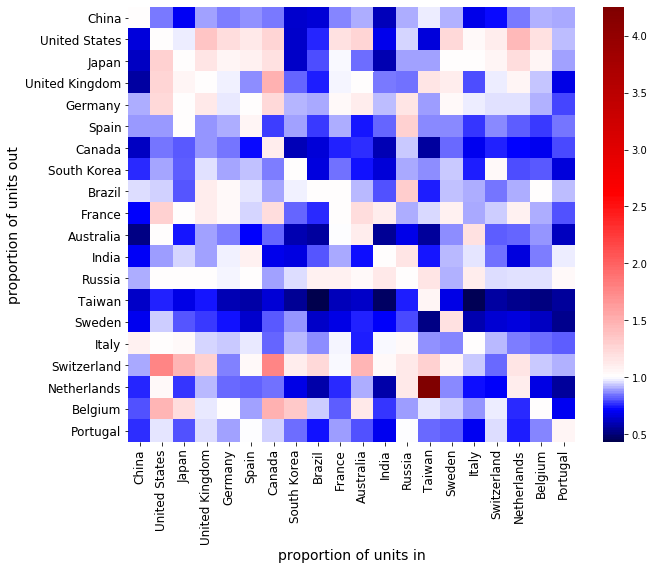

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(normed_byexpect.loc[top20,top20],cmap="seismic", norm=divnorm)
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)